In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [38]:
df = pd.read_csv('BostonHousingData.csv')
df = df.dropna()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [40]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


<AxesSubplot: >

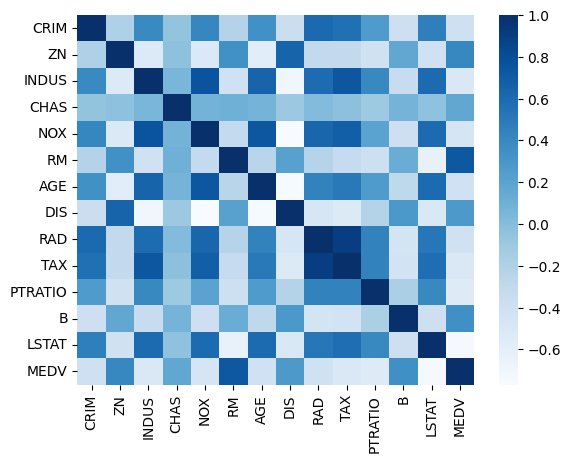

In [41]:
sns.heatmap(corr, yticklabels=df.columns.values, xticklabels=df.columns.values, cmap='Blues')

In [42]:
model = Sequential(name='Linh')
model.add(Dense(13, input_shape = (13,), activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "Linh"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 13)                182       
                                                                 
 dense_10 (Dense)            (None, 8)                 112       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [43]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [44]:
X = np.asanyarray(df.drop(['MEDV'], axis=1))
y = np.asanyarray(df['MEDV'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [50]:
train = model.fit(x=X_train, y=y_train, epochs=100, batch_size=10)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 16.9322
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 16.7813
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 16.7722
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 16.8685
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 16.8661
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 16.6563
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 16.8493
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 16.7470
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 16.7369
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 16.7822
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 16.6069
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 16.7022
Epoch 13/100
32/32 [=====

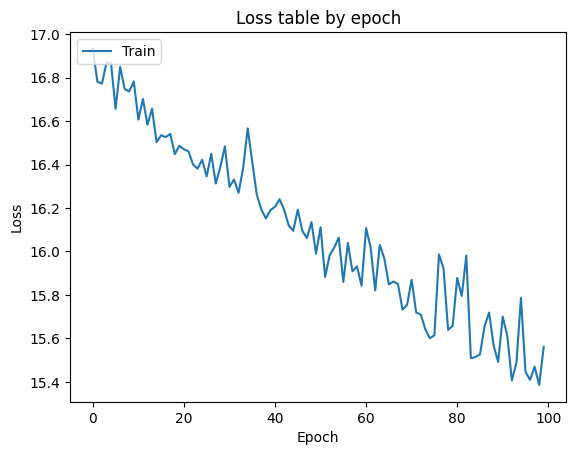

In [51]:
plt.plot(train.history['loss'])
plt.title('Loss table by epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')

In [52]:
prediction = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


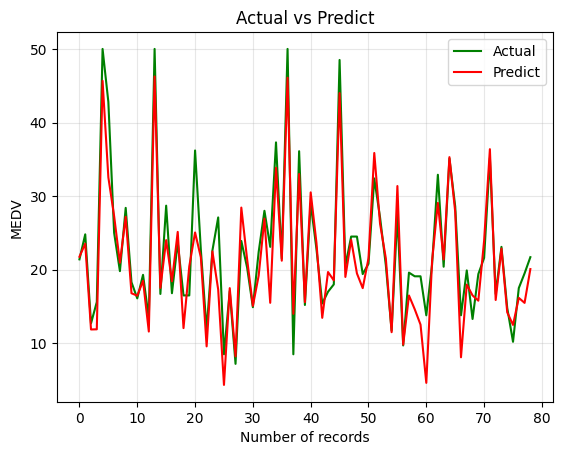

In [53]:
plt.plot(y_test, color ='green', label = 'Actual')
plt.plot(prediction, color = 'red', label = 'Predict')
plt.grid(alpha = 0.3)
plt.xlabel('Number of records')
plt.ylabel('MEDV')
plt.title('Actual vs Predict')
plt.legend()

In [54]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 12.6078


12.60783863067627

In [57]:
print('r2_squared_score:', r2_score(y_test, prediction))
train_predict = model.predict(X_train)
print('r2_score (train data set): ', r2_score(y_train, train_predict))

r2_squared_score: 0.8587231210909277
10/10 [==============================] - 0s 1000us/step
r2_score (train data set):  0.8140975801146192
